<a href="https://colab.research.google.com/github/MilanCugur/Writer_Identification_On_Words/blob/master/CVL_Database_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Import part

In [0]:
import os                     # for basic os operations
from zipfile import ZipFile  
import numpy as np
from matplotlib import pyplot as plt
import cv2

# Load Dataset

In [3]:
%%time

PATH = './drive/My Drive/ml_sem/cvl-database-1-1.zip' # path to .zip file
archive = ZipFile(PATH, 'r')
archive.extractall('./')  

archive.close()
del archive

CPU times: user 57.6 s, sys: 17.4 s, total: 1min 14s
Wall time: 1min 44s


In [0]:
!ls cvl-database-1-1/trainset/words/0001  # example of one writer

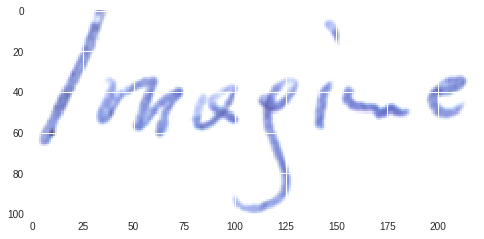

(101, 220, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [247]:
PATH = 'cvl-database-1-1/trainset/words/0002/0002-1-0-0-Imagine.tif'
img = plt.imread(PATH)

plt.imshow(img)
plt.show()

print(img.shape)
print(img)

# Tools

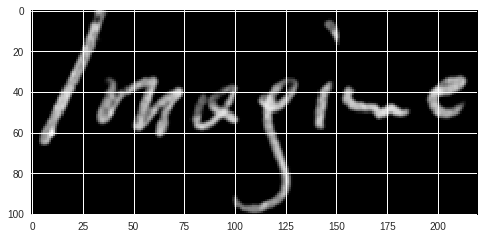

In [43]:
img = cv2.imread(PATH, cv2.IMREAD_GRAYSCALE)

plt.imshow(img)
plt.show()

In [44]:
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [45]:
img.shape

(101, 220)

In [0]:
def reread_image(img):
  """
  convert graysacle image from 8bit to 1bit
  """
  assert type(img)==np.ndarray and len(img.shape)==2, "Error: argument must be grayscale image"
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      img[i][j] = img[i][j] == 255
  return img

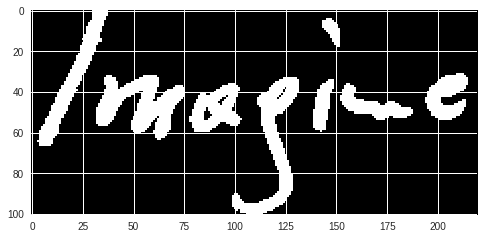

In [62]:
img1 = reread_image(cv2.imread(PATH, cv2.IMREAD_GRAYSCALE))

plt.imshow(img1)
plt.show()

In [48]:
img1

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [49]:
img1.shape

(101, 220)

In [0]:
def horizontal_histogram(img):
  """
  return horizontal handwritten histogram of image
  """
  assert type(img)==np.ndarray and len(img.shape)==2, "Error: argument must be grayscale image"
  height, width = img.shape
  hist = np.zeros((width,))
  
  for i in range(width):
    hist[i] = np.sum(img[:,i])  # sum column pixels
  
  return hist

In [68]:
hist = horizontal_histogram(img)
print(hist)

[101. 101. 101. 100.  93.  91.  90.  87.  86.  84.  82.  84.  82.  81.
  84.  85.  85.  84.  85.  85.  85.  85.  84.  85.  83.  84.  82.  80.
  80.  81.  79.  81.  76.  74.  75.  78.  74.  73.  77.  78.  80.  82.
  86.  92.  92.  94.  94.  94.  94.  89.  86.  83.  79.  77.  75.  73.
  74.  75.  76.  78.  78.  76.  76.  80.  80.  79.  79.  80.  81.  89.
  90.  91.  92.  93.  94.  96. 101. 101.  98.  92.  87.  85.  83.  82.
  82.  86.  89.  86.  84.  84.  83.  83.  85.  87.  85.  84.  83.  81.
  80.  76.  76.  80.  88.  93.  95.  96.  95.  95.  95.  95.  95.  91.
  88.  78.  75.  72.  69.  63.  60.  56.  56.  59.  52.  54.  59.  63.
  68.  73.  80.  90.  91.  94. 101. 101. 101. 101. 101. 101. 101.  92.
  85.  81.  78.  74.  73.  75.  78.  84.  85.  90.  90.  92.  98.  93.
  90.  88.  87.  88.  88.  90.  94.  94.  94.  94.  95.  95.  95.  95.
  94.  93.  92.  93.  94.  94.  94.  93.  94.  94.  93.  94.  94.  95.
  96.  96.  96.  97.  97.  99. 101. 101. 101. 101. 101. 101.  98.  92.
  89. 

In [0]:
def horizontal_histogram_plot(img):
  """
  plot image and handwritten histogram simultaneously  
  """
  assert type(img)==np.ndarray and len(img.shape)==2, "Error: argument must be grayscale image"

  hist = horizontal_histogram(img)
  himg = np.zeros(img.shape)
  for i in range(img.shape[1]):
    for j in range(0, int(hist[i])):
      himg[j,i] = 1
  
  plt.imshow(img)
  plt.show()
  plt.imshow(himg)
  plt.show()

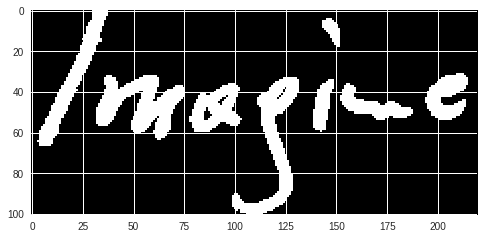

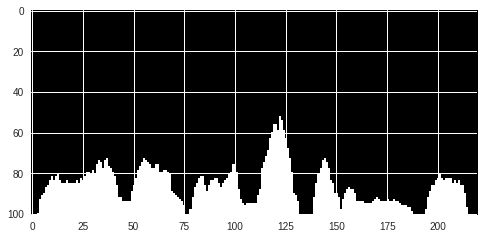

In [80]:
horizontal_histogram_plot(img)

In [0]:
def parse_gt_from_path(imgpath):  
  """
  parse ground truth from path
  """
  if not imgpath.endswith('.tif'):
      raise ValueError("Error: path isn't image")
  else:
     imgpath = imgpath[:-4]
  i = 1
  while imgpath[-i]!='-':
      i += 1
  gt = imgpath[-i+1:]
  return gt

def parse_wt_from_path(imgpath):  
  """
  Parse writer id from image path
  """
  if not imgpath.endswith('.tif'):
      raise ValueError("Error: path isn't image")
  else:
      imgpath = imgpath[:-4]
  i = 1
  while imgpath[-i]!=os.sep:
      i += 1
  start = i-1  # \0052-1-0-0-Imagine
  while imgpath[-i]!='-':
      i -= 1
  return int(imgpath[-start:-i])  # int(0052)

In [0]:
def crop_characters(path):
  """
  crop the handwritten characters from given path (path like: 'cvl-database-1-1/trainset/words/0002/0002-1-0-0-Imagine.tif')
  """
  id = parse_wt_from_path(path)     # 2
  gt = parse_gt_from_path(path)     # "Imagine"
  n = len(gt)                       # number of chars on the image, 7
  
  print(path)
  print(id)
  print(gt)
  
  img = reread_image(cv2.imread(PATH, cv2.IMREAD_GRAYSCALE))
  hist = horizontal_histogram(img)
  avgwidth = int(hist.shape[0]/n)  # average width of character
  splits = []
  expected_splits = [avgwidth*i for i in range(1, n)]
  OFFSET = 5 
  for split in expected_splits:
    _split = split
    for j in range(1, OFFSET):  # prefer inner splits
      if hist[_split-j]>hist[_split]:
        _split = _split - j
      if hist[_split+j]>hist[_split]:
        _split = _split + j
    splits.append(_split)
  
  print('Splits: ', splits)
  for x, y in zip([0]+splits, splits+[-1]):
    print(x, y)
    plt.imshow(img[:,x:y])
    plt.show()
      
  return splits

# View images

## Only histogram

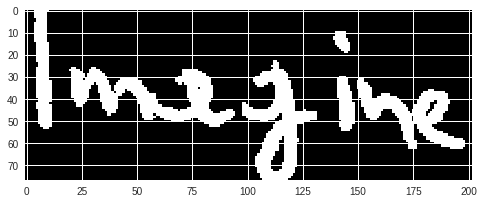

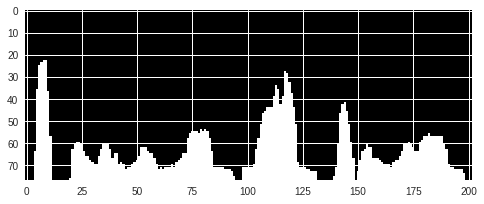

In [260]:
path = './cvl-database-1-1/trainset/words/0001/0001-1-0-0-Imagine.tif'
horizontal_histogram_plot(reread_image(cv2.imread(path, cv2.IMREAD_GRAYSCALE)))

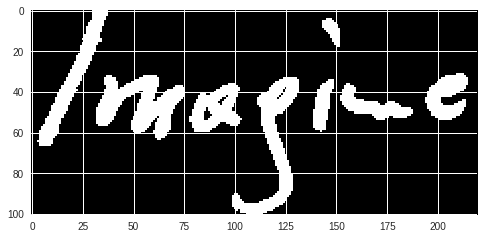

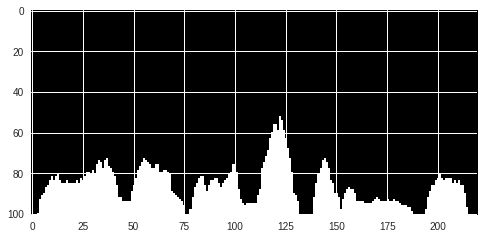

In [261]:
path = './cvl-database-1-1/trainset/words/0002/0002-1-0-0-Imagine.tif'
horizontal_histogram_plot(reread_image(cv2.imread(path, cv2.IMREAD_GRAYSCALE)))

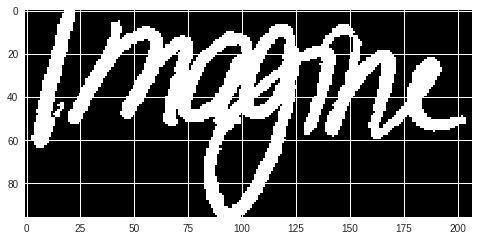

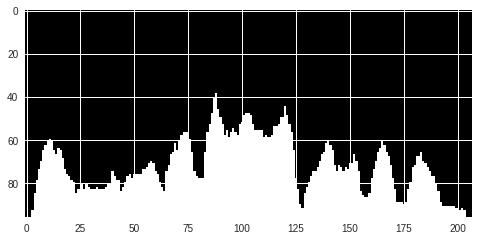

In [262]:
path = './cvl-database-1-1/trainset/words/0003/0003-1-0-0-Imagine.tif'
horizontal_histogram_plot(reread_image(cv2.imread(path, cv2.IMREAD_GRAYSCALE)))

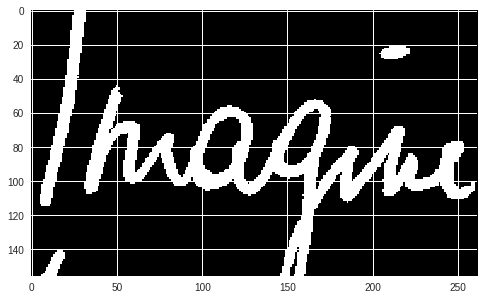

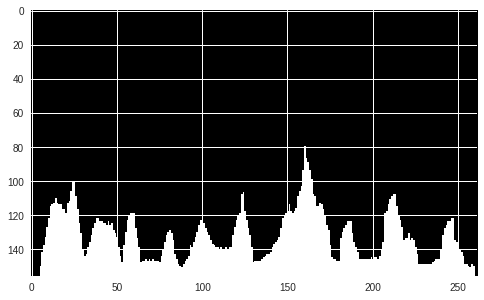

In [267]:
path = './cvl-database-1-1/trainset/words/0004/0004-1-0-1-Imagine.tif'
horizontal_histogram_plot(reread_image(cv2.imread(path, cv2.IMREAD_GRAYSCALE)))

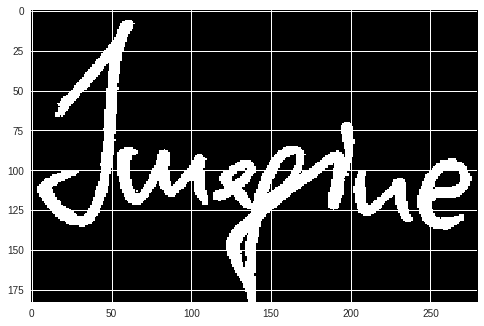

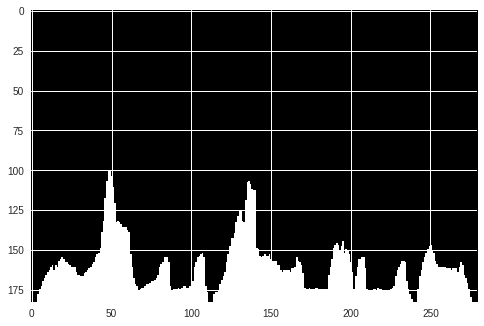

In [270]:
path = './cvl-database-1-1/trainset/words/0005/0005-1-0-0-Imagine.tif'
horizontal_histogram_plot(reread_image(cv2.imread(path, cv2.IMREAD_GRAYSCALE)))

## Histogram + crop

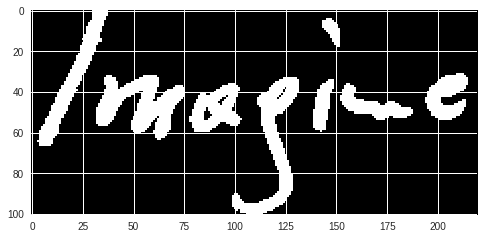

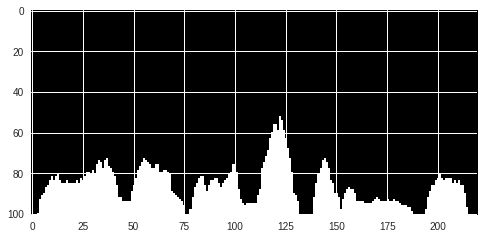

./cvl-database-1-1/trainset/words/0002/0002-1-0-0-Imagine.tif
2
Imagine
Splits:  [31, 63, 93, 134, 152, 189]
0 31


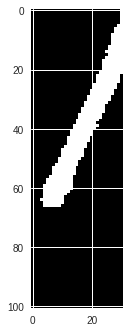

31 63


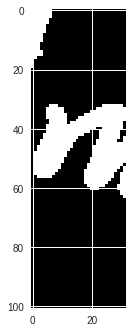

63 93


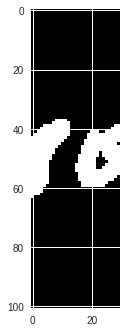

93 134


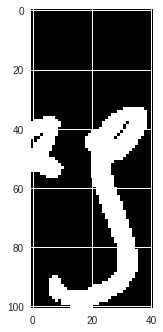

134 152


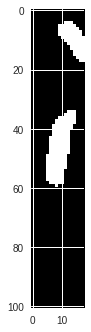

152 189


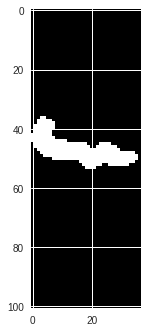

189 -1


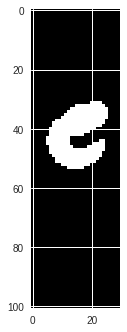

[31, 63, 93, 134, 152, 189]

In [271]:
path = './cvl-database-1-1/trainset/words/0002/0002-1-0-0-Imagine.tif'
horizontal_histogram_plot(reread_image(cv2.imread(path, cv2.IMREAD_GRAYSCALE)))
crop_characters(path)

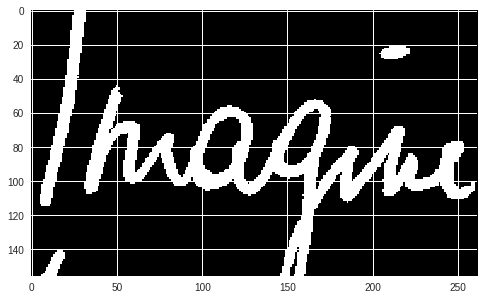

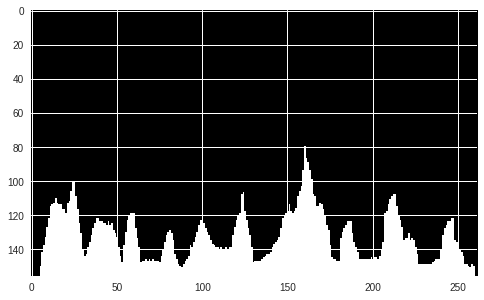

./cvl-database-1-1/trainset/words/0004/0004-1-0-1-Imagine.tif
4
Imagine
Splits:  [31, 63, 93, 134, 152, 189]
0 31


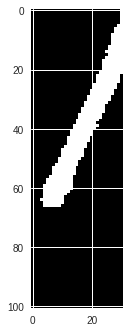

31 63


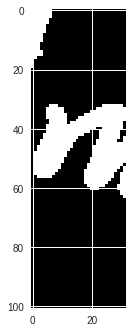

63 93


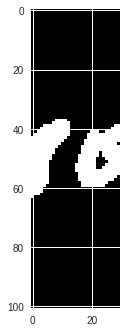

93 134


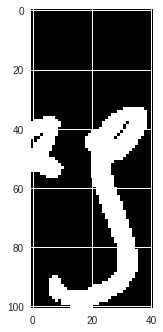

134 152


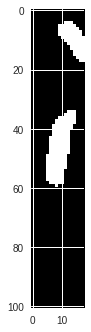

152 189


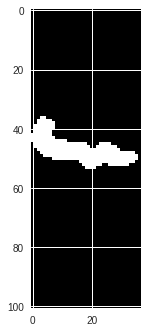

189 -1


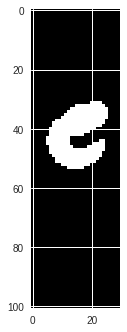

[31, 63, 93, 134, 152, 189]

In [272]:
path = './cvl-database-1-1/trainset/words/0004/0004-1-0-1-Imagine.tif'
horizontal_histogram_plot(reread_image(cv2.imread(path, cv2.IMREAD_GRAYSCALE)))
crop_characters(path)

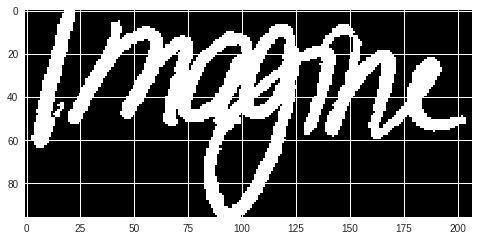

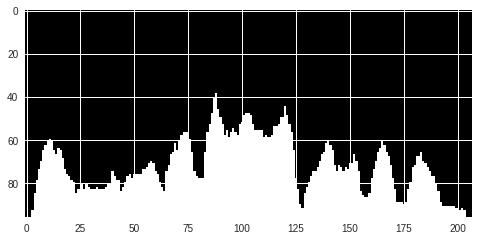

./cvl-database-1-1/trainset/words/0003/0003-1-0-0-Imagine.tif
3
Imagine
Splits:  [31, 63, 93, 134, 152, 189]
0 31


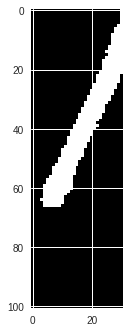

31 63


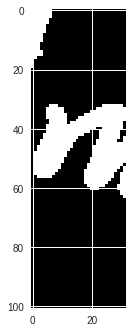

63 93


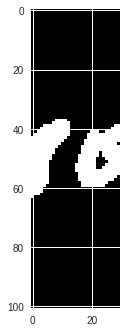

93 134


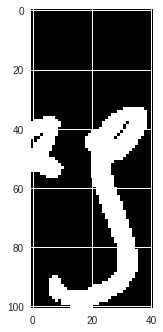

134 152


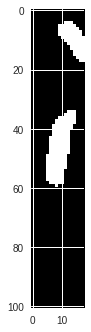

152 189


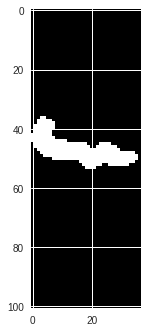

189 -1


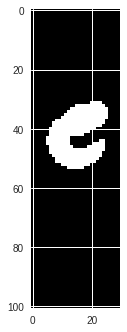

[31, 63, 93, 134, 152, 189]

In [273]:
path = './cvl-database-1-1/trainset/words/0003/0003-1-0-0-Imagine.tif'
horizontal_histogram_plot(reread_image(cv2.imread(path, cv2.IMREAD_GRAYSCALE)))
crop_characters(path)